In [22]:
#https://www.kaggle.com/c/football-data-challenge/discussion/19505#
#accuracy seems to be 50% at best for all participants# 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"C:\\Contents\\Kaggle\\football-data-challenge\\train.csv")

df.head()

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,1.55,6.00,4.00,1.53,7.00,4.00,1.50,7.50,4.0,1.55
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,1.70,4.80,3.60,1.75,4.75,3.60,1.75,4.80,3.6,1.80
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,3.00,2.37,3.20,3.00,2.50,3.00,3.00,2.55,3.2,3.10
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,4.90,1.61,3.75,5.50,1.70,3.75,4.80,1.67,3.9,5.75
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,3.80,1.85,3.50,4.20,2.00,3.40,3.75,2.00,3.4,4.10


In [23]:
import datetime
from dateutil.parser import parse
from dateutil.tz import gettz

def getTS(dt):
    tzinfos = {'UTC' : gettz('Europe/London')}
    date_str = '{0} 00:00:00'.format(dt)
    str_to_dt = parse(date_str + ' UTC', tzinfos=tzinfos)
    return int(str_to_dt.timestamp())

df['Date'] = df['Date'].apply(getTS)

In [24]:
catcols = ['HomeTeam','AwayTeam']
df = pd.get_dummies(df, columns=catcols)
df.head()


,ID,Date,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,...,AwayTeam_Palermo,AwayTeam_Parma,AwayTeam_Reggina,AwayTeam_Roma,AwayTeam_Sampdoria,AwayTeam_Sassuolo,AwayTeam_Siena,AwayTeam_Torino,AwayTeam_Udinese,AwayTeam_Verona
0,611,1377298800,A,8.00,4.00,1.45,7.25,4.00,1.48,5.50,...,0,0,0,0,0,0,0,0,0,0
1,612,1377298800,H,4.75,3.60,1.75,4.75,3.75,1.70,4.70,...,0,0,0,0,0,0,0,0,0,0
2,613,1377385200,H,2.50,3.00,3.00,2.45,3.10,3.00,2.30,...,0,0,0,0,0,0,0,0,0,0
3,614,1377385200,H,1.62,3.75,5.50,1.60,3.75,5.75,1.65,...,0,0,0,0,0,0,0,0,0,0
4,615,1377385200,H,2.00,3.40,3.75,1.95,3.40,3.90,1.90,...,0,0,0,0,0,0,0,0,1,0


In [25]:
nullCols = []
for col in df.columns:
    if df[col].isnull().values.any():
        print(col)
        nullCols.append(col)

B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
LBH
LBD
LBA
WHH
WHD
WHA
VCH
VCD
VCA


In [26]:
for c in nullCols:
    df[c] = df[c].fillna(df[c].mean())

In [27]:
df.isnull().values.any()

False

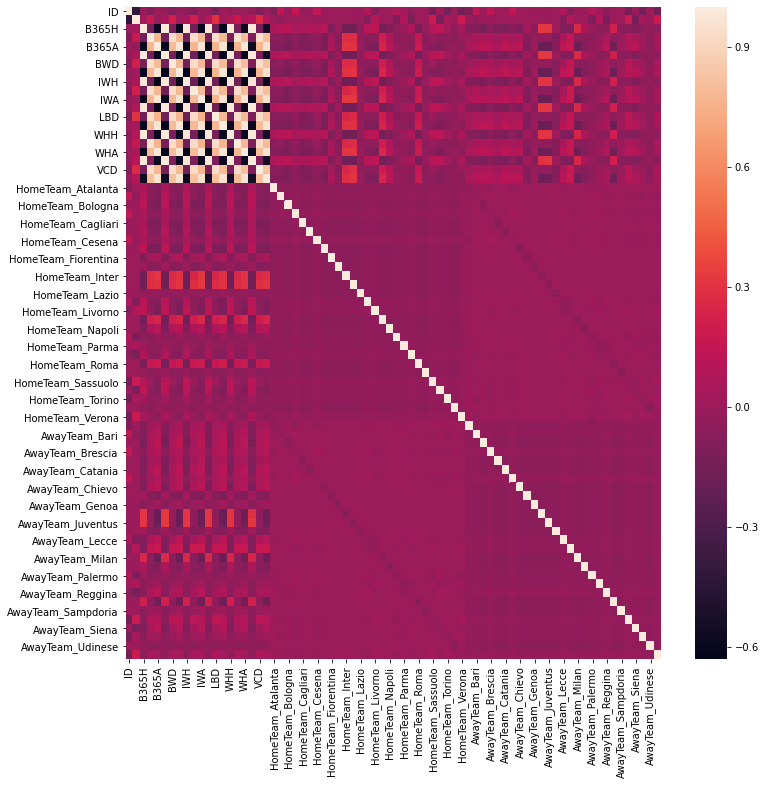

In [12]:
import seaborn as sb

plt.figure(figsize= (12,12))
sb.heatmap(df.corr())
plt.show()

In [13]:
df.corr()

,ID,Date,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,AwayTeam_Palermo,AwayTeam_Parma,AwayTeam_Reggina,AwayTeam_Roma,AwayTeam_Sampdoria,AwayTeam_Sassuolo,AwayTeam_Siena,AwayTeam_Torino,AwayTeam_Udinese,AwayTeam_Verona
ID,1.000000,-0.432967,-0.012782,-0.102608,0.004214,-0.030821,-0.090640,-0.022852,-0.034806,-0.093880,...,0.086106,0.029765,-0.050317,-0.001321,0.001809,-0.147294,-0.000106,-0.137023,-0.000495,-0.144824
Date,-0.432967,1.000000,0.029706,0.174840,-0.019291,0.056243,0.213860,0.024295,0.053531,0.209138,...,-0.104728,0.070139,-0.119707,-0.000709,0.000956,0.178743,-0.127652,0.043834,-0.000045,0.179950
B365H,-0.012782,0.029706,1.000000,-0.143080,-0.592188,0.987561,-0.127834,-0.605126,0.978032,-0.158782,...,-0.010830,-0.058856,-0.063187,0.211090,-0.060852,-0.064874,-0.090807,-0.053068,-0.024079,-0.050282
B365D,-0.102608,0.174840,-0.143080,1.000000,0.779263,-0.135240,0.949631,0.782385,-0.159252,0.947310,...,-0.053477,-0.020687,0.048565,-0.041525,-0.019334,0.099283,0.042292,0.009894,-0.063919,0.042255
B365A,0.004214,-0.019291,-0.592188,0.779263,1.000000,-0.603279,0.792823,0.971752,-0.616535,0.775145,...,-0.037654,0.006023,0.103983,-0.165963,0.012031,0.079685,0.109231,0.015417,-0.045553,0.024725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AwayTeam_Sassuolo,-0.147294,0.178743,-0.064874,0.099283,0.079685,-0.066513,0.114430,0.114336,-0.069962,0.122460,...,-0.022208,-0.022208,-0.012658,-0.025811,-0.025811,1.000000,-0.018016,-0.018016,-0.025811,-0.012658
AwayTeam_Siena,-0.000106,-0.127652,-0.090807,0.042292,0.109231,-0.092896,0.028903,0.095173,-0.090644,0.035981,...,-0.031607,-0.031607,-0.018016,-0.036736,-0.036736,-0.018016,1.000000,-0.025641,-0.036736,-0.018016
AwayTeam_Torino,-0.137023,0.043834,-0.053068,0.009894,0.015417,-0.050575,0.003171,0.028858,-0.050662,0.005101,...,-0.031607,-0.031607,-0.018016,-0.036736,-0.036736,-0.018016,-0.025641,1.000000,-0.036736,-0.018016
AwayTeam_Udinese,-0.000495,-0.000045,-0.024079,-0.063919,-0.045553,-0.035642,-0.058161,-0.035159,-0.028076,-0.053932,...,-0.045283,-0.045283,-0.025811,-0.052632,-0.052632,-0.025811,-0.036736,-0.036736,1.000000,-0.025811


In [14]:
tmp = pd.read_csv(r"C:\\Contents\\Kaggle\\football-data-challenge\\train.csv")
tmp.corr()


,ID,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
ID,1.000000,-0.012807,-0.102807,0.004222,-0.030962,-0.091056,-0.022957,-0.034945,-0.094256,-0.018299,-0.030394,-0.118568,0.010602,-0.021069,-0.019105,0.005405,-0.027743,-0.091551,-0.010491
B365H,-0.012807,1.000000,-0.143080,-0.592188,0.991218,-0.128451,-0.607713,0.981089,-0.159493,-0.598691,0.981982,-0.167960,-0.600086,0.986604,-0.140057,-0.591088,0.984795,-0.132198,-0.560507
B365D,-0.102807,-0.143080,1.000000,0.779263,-0.138331,0.972411,0.800704,-0.161323,0.960897,0.797051,-0.141442,0.947259,0.791739,-0.127752,0.964116,0.798971,-0.110895,0.966223,0.827192
B365A,0.004222,-0.592188,0.779263,1.000000,-0.604446,0.795300,0.974180,-0.618747,0.778991,0.973285,-0.600197,0.760137,0.970832,-0.586315,0.768007,0.977942,-0.583182,0.783410,0.961495
BWH,-0.030962,0.991218,-0.138331,-0.604446,1.000000,-0.135862,-0.619603,0.985792,-0.158015,-0.609692,0.988253,-0.161903,-0.612287,0.987752,-0.137140,-0.601984,0.987740,-0.132964,-0.569064
BWD,-0.091056,-0.128451,0.972411,0.795300,-0.135862,1.000000,0.787103,-0.151452,0.953627,0.789977,-0.128180,0.951705,0.793682,-0.112987,0.959477,0.804991,-0.101765,0.966036,0.829038
BWA,-0.022957,-0.607713,0.800704,0.974180,-0.619603,0.787103,1.000000,-0.633952,0.797736,0.971006,-0.615151,0.782135,0.975639,-0.601358,0.778021,0.972777,-0.595084,0.794299,0.960586
IWH,-0.034945,0.981089,-0.161323,-0.618747,0.985792,-0.151452,-0.633952,1.000000,-0.182642,-0.630873,0.982672,-0.180696,-0.629194,0.978691,-0.159158,-0.618171,0.975309,-0.154863,-0.585013
IWD,-0.094256,-0.159493,0.960897,0.778991,-0.158015,0.953627,0.797736,-0.182642,1.000000,0.801038,-0.156211,0.947975,0.794036,-0.142286,0.945220,0.799633,-0.129562,0.954192,0.832902
IWA,-0.018299,-0.598691,0.797051,0.973285,-0.609692,0.789977,0.971006,-0.630873,0.801038,1.000000,-0.608166,0.770960,0.966857,-0.594268,0.774412,0.967059,-0.588103,0.786783,0.955449


In [28]:
#B365H - BWH, IWH, LBH, WHH, VCH   
#B365D - BWD, IWD, LBD, WHD, VCD
#B365A - BWA, IWA, LBA, WHA, VCA

corrCols = ['BWH', 'IWH', 'LBH', 'WHH', 'VCH','BWD', 'IWD', 'LBD', 'WHD', 'VCD','BWA', 'IWA', 'LBA', 'WHA', 'VCA']

for col in corrCols:
    del df[col]




In [29]:
df.head()

,ID,Date,FTR,B365H,B365D,B365A,HomeTeam_Atalanta,HomeTeam_Bari,HomeTeam_Bologna,HomeTeam_Brescia,...,AwayTeam_Palermo,AwayTeam_Parma,AwayTeam_Reggina,AwayTeam_Roma,AwayTeam_Sampdoria,AwayTeam_Sassuolo,AwayTeam_Siena,AwayTeam_Torino,AwayTeam_Udinese,AwayTeam_Verona
0,611,1377298800,A,8.00,4.00,1.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,612,1377298800,H,4.75,3.60,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,613,1377385200,H,2.50,3.00,3.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,614,1377385200,H,1.62,3.75,5.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,615,1377385200,H,2.00,3.40,3.75,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


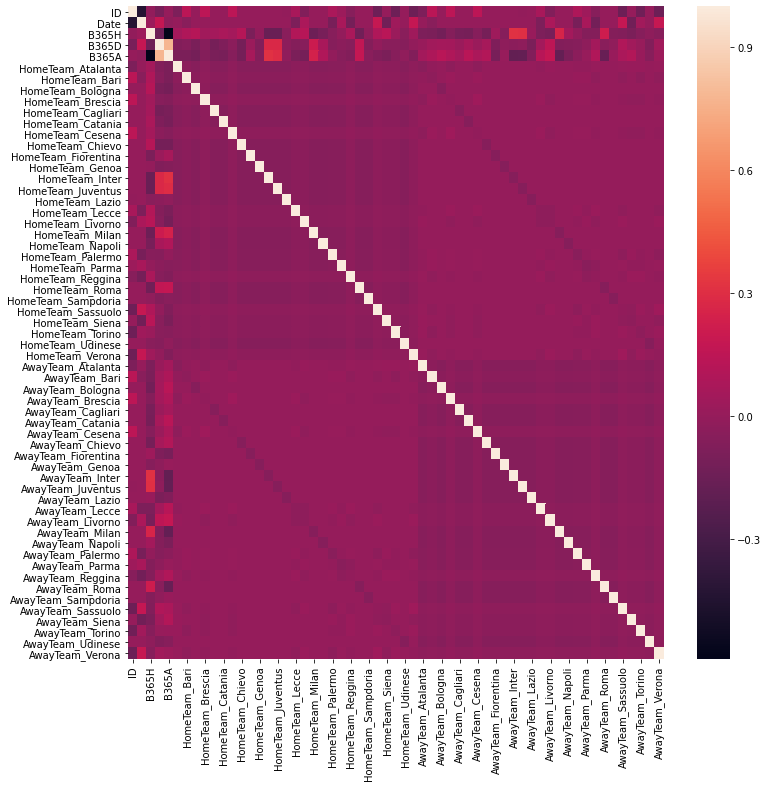

In [17]:
import seaborn as sb

plt.figure(figsize= (12,12))
sb.heatmap(df.corr())
plt.show()

In [30]:
ftr_map = {'H': 0, 'A' : 1, 'D': 2}
df['FTR'] = df['FTR'].map(ftr_map)

In [31]:
from sklearn.model_selection import train_test_split
feature_col_names = [col for col in df.columns if col not in set(["FTR", "ID"])]
predicted_class_names = ["FTR"]

X = df[feature_col_names].values

Y = df[predicted_class_names].values

split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [32]:
set(df['FTR'])

{0, 1, 2}

In [33]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


nb_predict_train = nb_model.predict(X_train)
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("GaussianNB Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train )))
print("GaussianNB Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test )))
print('**********Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('**********Classsification report**************')
print("{}".format(metrics.classification_report(y_test, nb_predict_test)))

GaussianNB Accuracy training : 0.4784
GaussianNB Accuracy testing : 0.5022
**********Confusion metrics**************
[[229   0   0]
 [110   0   0]
 [117   0   0]]
**********Classsification report**************
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       229
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00       117

    accuracy                           0.50       456
   macro avg       0.17      0.33      0.22       456
weighted avg       0.25      0.50      0.34       456



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

print("RF Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train )))
print("RF Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test )))
print('********** RF Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print('**********RF Classsification report**************')
print("{}".format(metrics.classification_report(y_test, rf_predict_test)))

RF Accuracy training : 0.9774
RF Accuracy testing : 0.4803
********** RF Confusion metrics**************
[[160  37  32]
 [ 57  41  12]
 [ 72  27  18]]
**********RF Classsification report**************
              precision    recall  f1-score   support

           0       0.55      0.70      0.62       229
           1       0.39      0.37      0.38       110
           2       0.29      0.15      0.20       117

    accuracy                           0.48       456
   macro avg       0.41      0.41      0.40       456
weighted avg       0.45      0.48      0.45       456



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.ravel())
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

print("LR Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,lr_predict_train )))
print("LR Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test )))
print('********** LR Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('**********LR Classsification report**************')
print("{}".format(metrics.classification_report(y_test, lr_predict_test)))

LR Accuracy training : 0.4784
LR Accuracy testing : 0.5022
********** LR Confusion metrics**************
[[229   0   0]
 [110   0   0]
 [117   0   0]]
**********LR Classsification report**************
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       229
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00       117

    accuracy                           0.50       456
   macro avg       0.17      0.33      0.22       456
weighted avg       0.25      0.50      0.34       456



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from xgboost.sklearn import XGBClassifier
xgb_regr = XGBClassifier()

xgb_regr.fit(X_train, y_train.ravel())
xgb_regr_predict_train = xgb_regr.predict(X_train)
xgb_regr_predict_test = xgb_regr.predict(X_test)

from sklearn import metrics

print("XGB Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,xgb_regr_predict_train )))
print("XGB Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,xgb_regr_predict_test )))
print('********** XGB Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, xgb_regr_predict_test)))
print('**********XGB Classsification report**************')
print("{}".format(metrics.classification_report(y_test, xgb_regr_predict_test)))

XGB Accuracy training : 0.9868
XGB Accuracy testing : 0.4715
********** XGB Confusion metrics**************
[[156  36  37]
 [ 47  44  19]
 [ 72  30  15]]
**********XGB Classsification report**************
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       229
           1       0.40      0.40      0.40       110
           2       0.21      0.13      0.16       117

    accuracy                           0.47       456
   macro avg       0.39      0.40      0.39       456
weighted avg       0.44      0.47      0.45       456

